# <center>Exercise 3 Credit Card Fraud Dection</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## 1 Business Understanding

**Organization: American Express</br>**
**Goal: Detect Credit Card Fraud</br>**
**Method: Using Classification Model Decision Tree and SVM**

## 2 Data Understanding

### 2.1 Load Data

In [3]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### 2.2 Clean Data
- Check any missing values
- Check any duplicated
- Check any outliers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

>Notes:
>- There is no missing values.

**Check any duplicated records**

In [5]:
df[df.duplicated() == True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


>Note:
>- There are 31 duplicated records.

**Remove the duplicated**

In [6]:
df_1 = df.drop_duplicates()
df_1.shape

(283726, 31)

**Check any outliers**

In [7]:
cols = list(df_1.columns)
cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

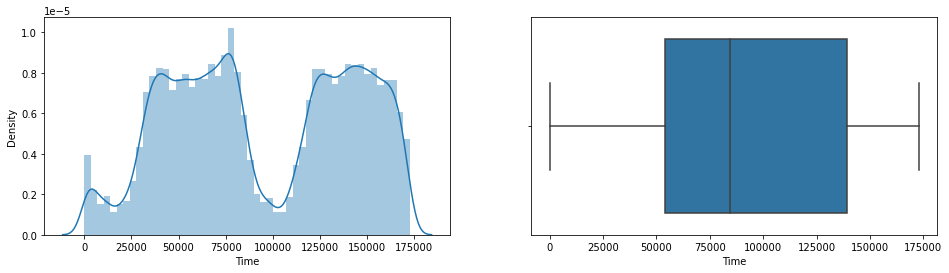

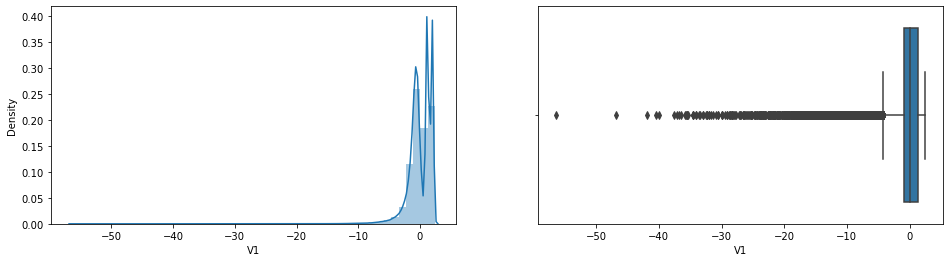

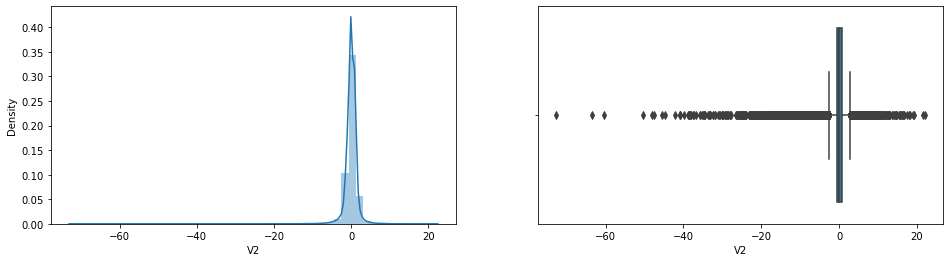

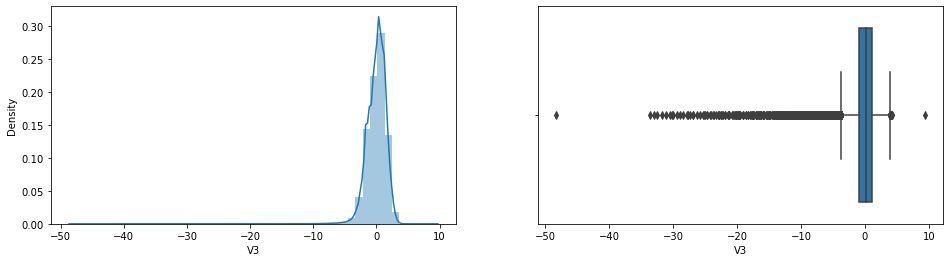

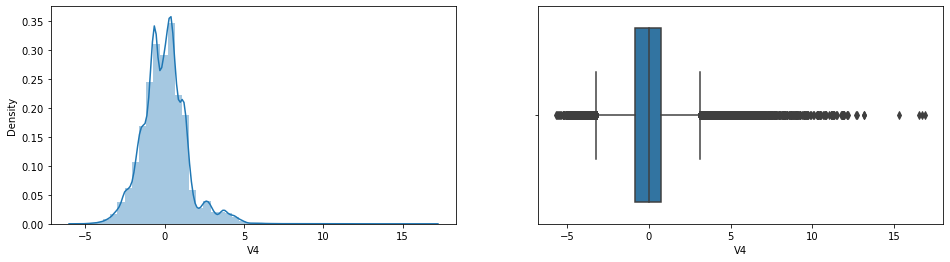

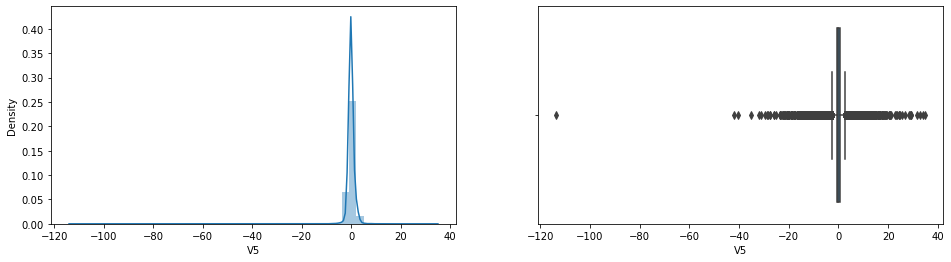

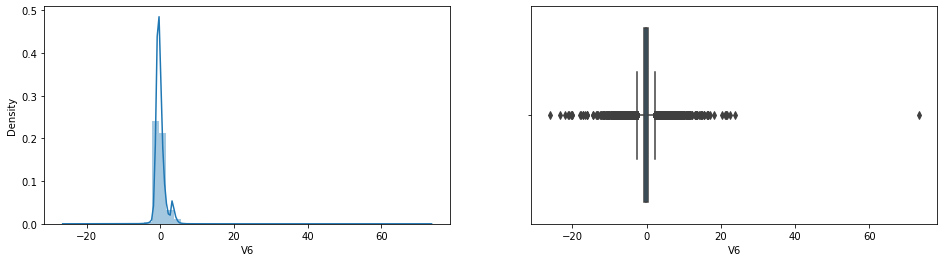

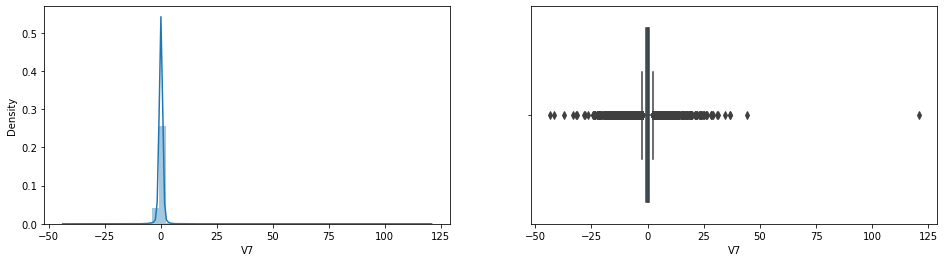

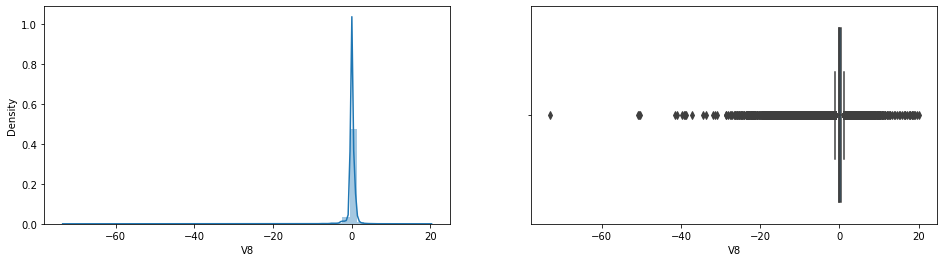

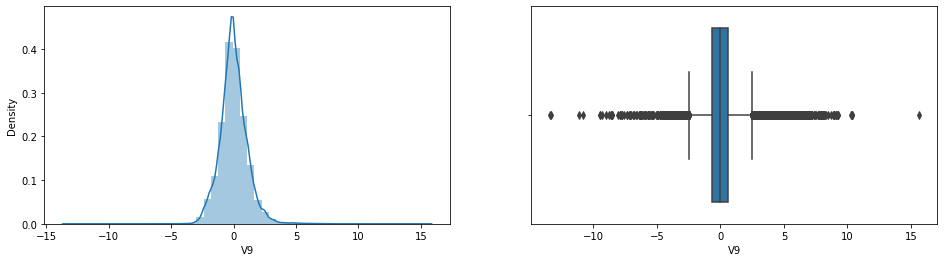

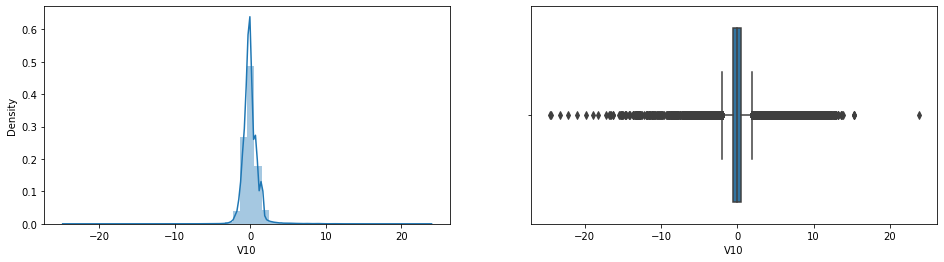

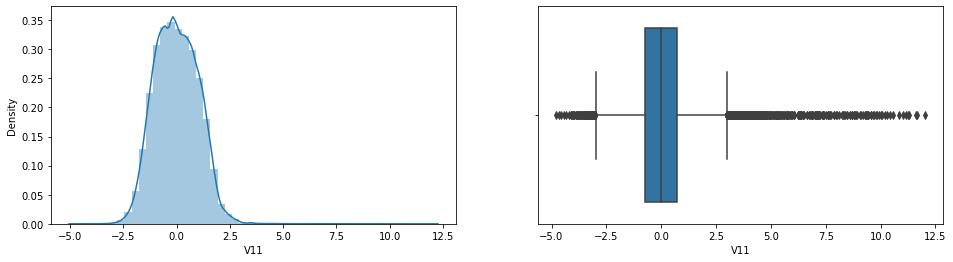

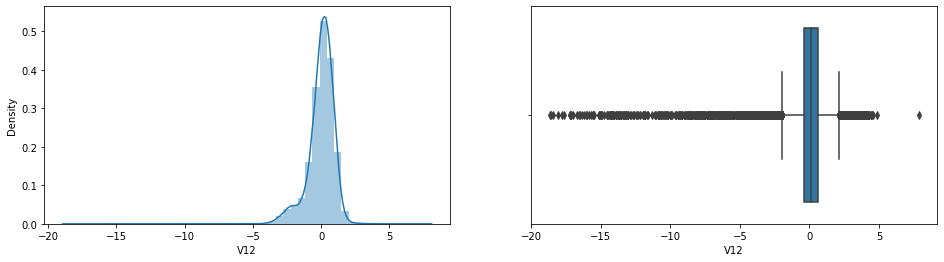

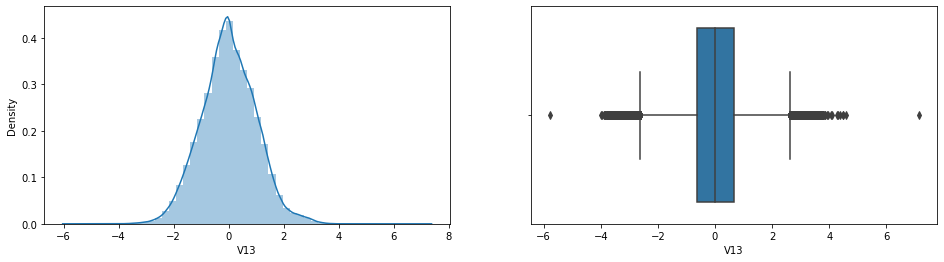

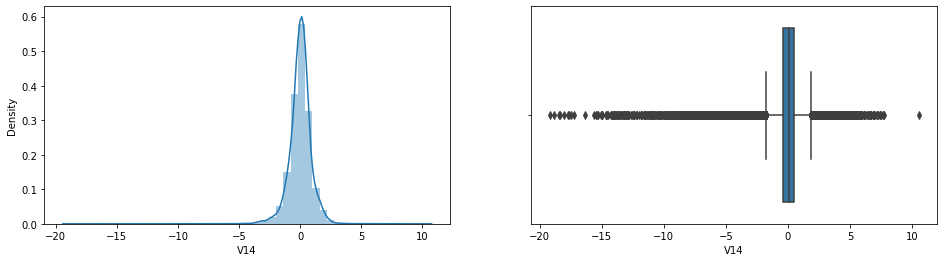

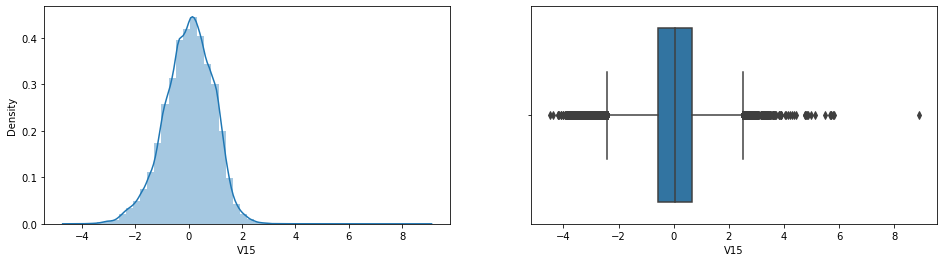

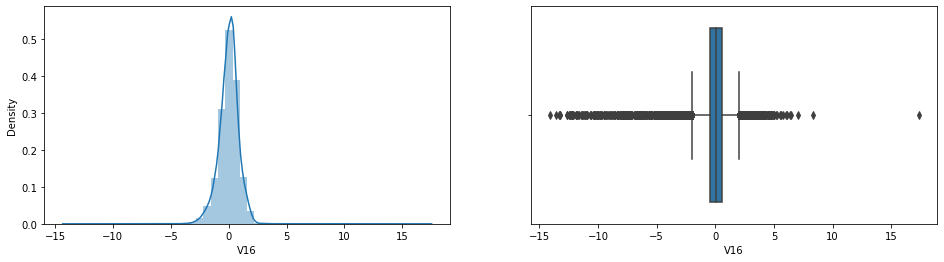

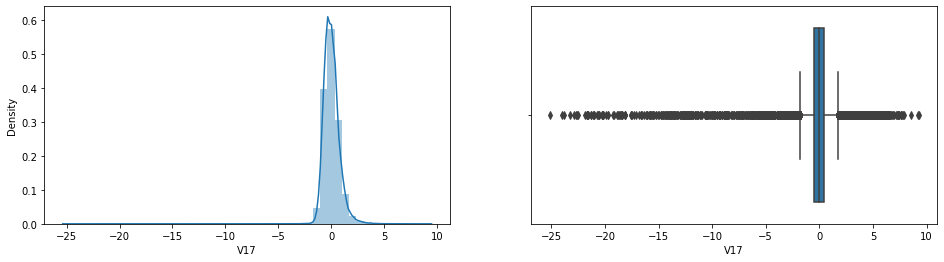

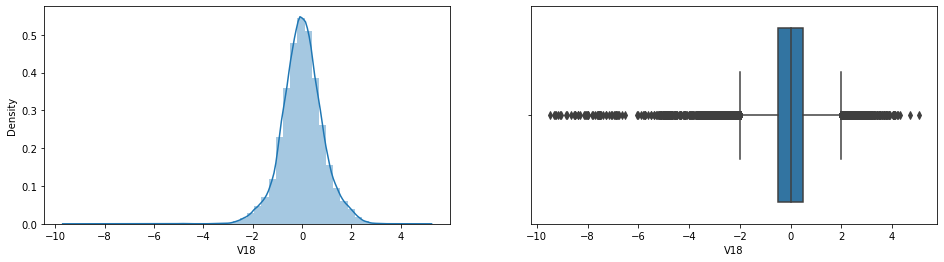

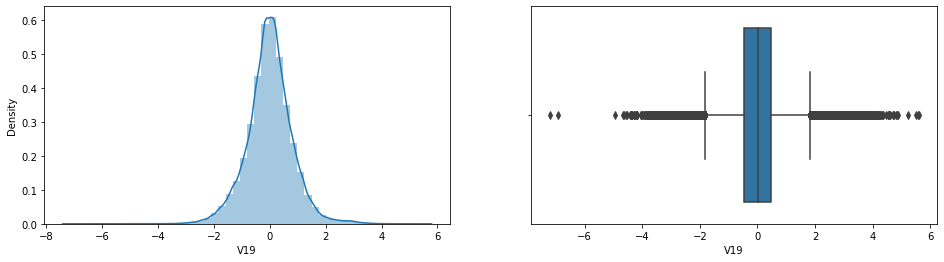

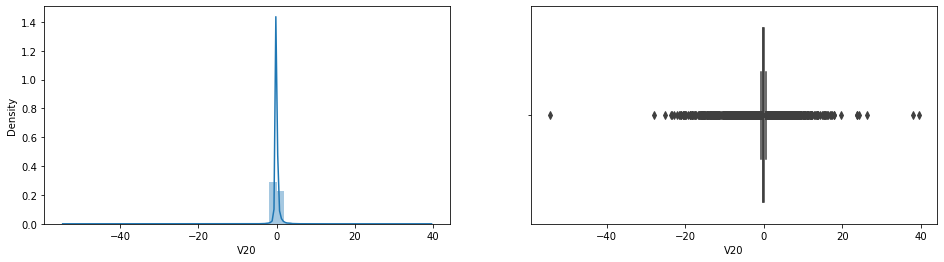

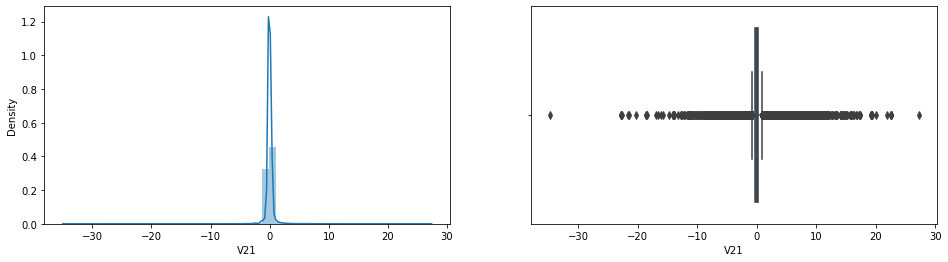

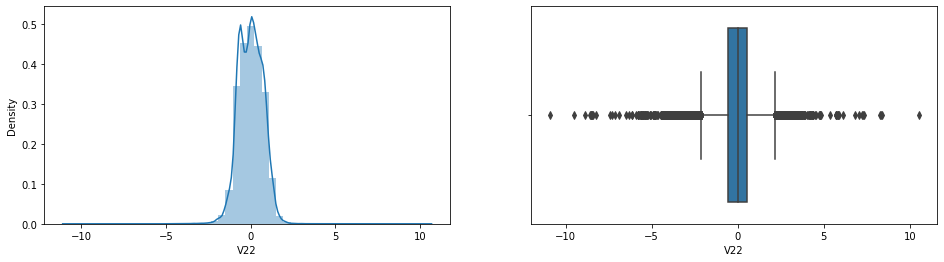

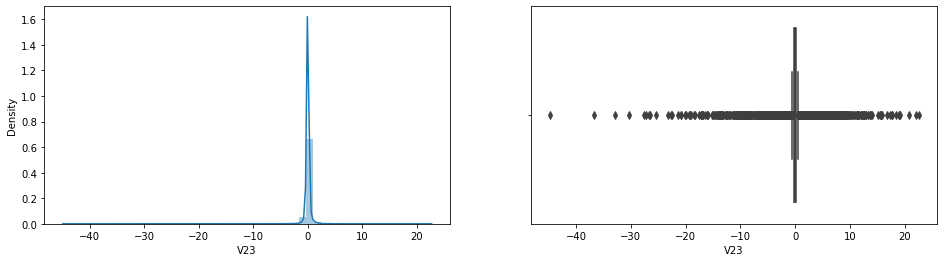

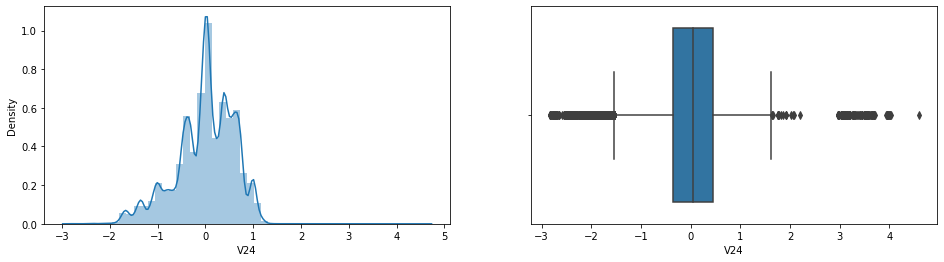

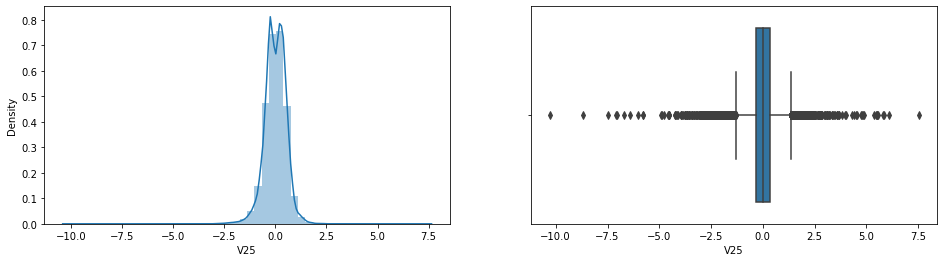

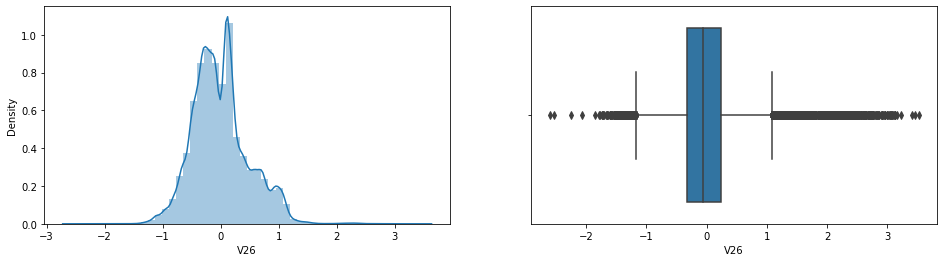

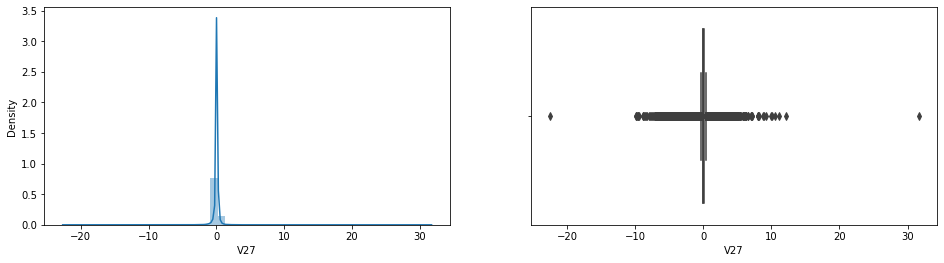

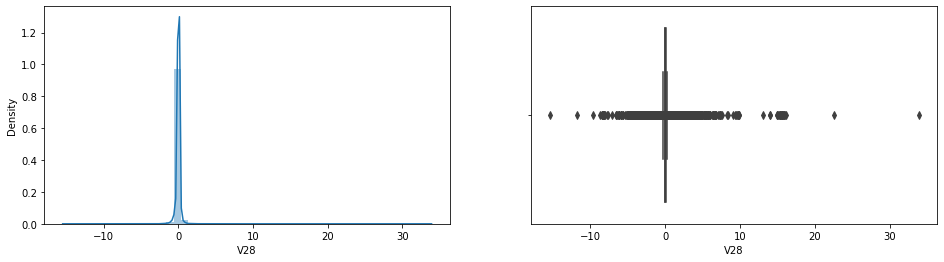

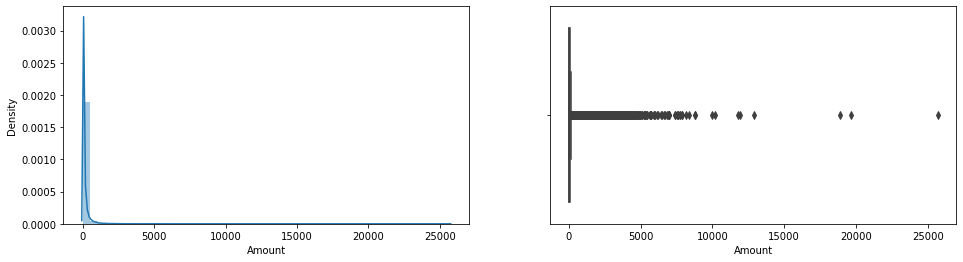

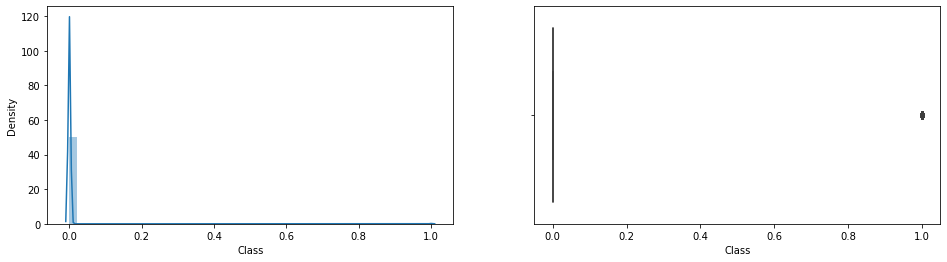

In [8]:
# Visualize data distribution of each variables

for c in cols:
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    sns.distplot(df_1[c])
    plt.subplot(1,2,2)
    sns.boxplot(df_1[c])

    plt.show()

>Note:
>- Look like the data has been normalized.
>- There are too many outliers as shown in the figures. If dropping them all could lead to data leakage.
>- Will trim 0.1% data at both left and right end for columns except 'Time', 'V1', 'Amount', 'Class'.

In [9]:
cols_1 = cols.copy()
colName = ['Time', 'V1', 'Amount', 'Class']
for n in colName:
    cols_1.remove(n)
    
cols_1

['V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28']

In [10]:
for c in cols_1:

    # Finding the upper and lower limits
    upper_limit = df_1[c].quantile(0.999)
    lower_limit = df_1[c].quantile(0.001)

    # Apply trimming
    df_2 = df_1[(df_1[c] <= upper_limit) & (df[c] >= lower_limit)]

df_2.shape

(283158, 31)

>Note:
>- After trimming, the records are reduced from 283726 to 283158
>- Review the min of V1 and max of Amount changes.

In [11]:
df_1.V1.min()

-56.407509631329

In [12]:
df_2.V1.min()

-41.9287375244141

In [13]:
df_1.Amount.max()

25691.16

In [14]:
df_2.Amount.max()

11898.09

### 2.3 Exploratory Data Analysis

**(1) Visualize Class Distribution**

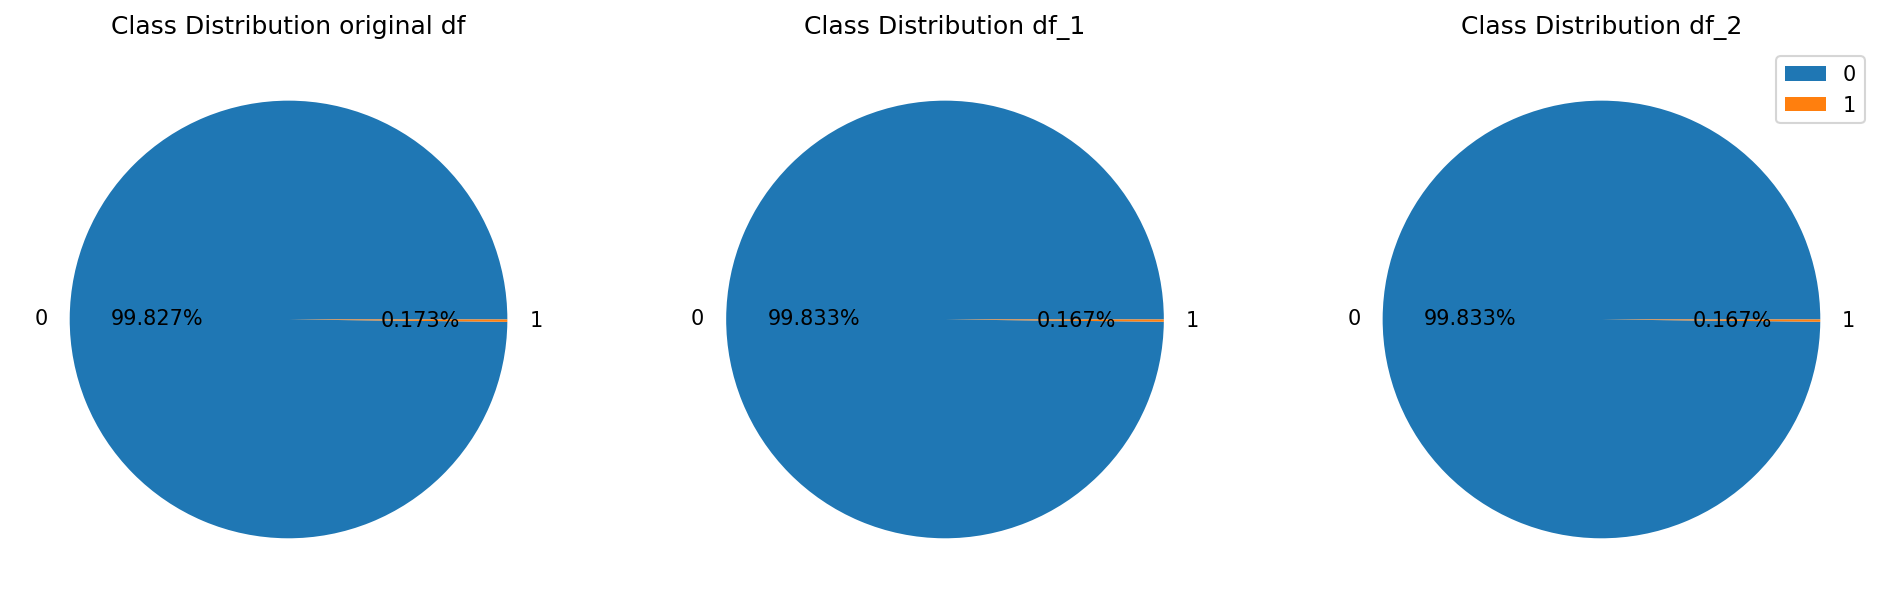

In [15]:
classes_0 = df['Class'].value_counts(normalize=True)
classes_1 = df_1['Class'].value_counts(normalize=True)
classes_2 = df_2['Class'].value_counts(normalize=True)

plt.figure(figsize=(16,8), dpi=150)

plt.subplot(1,3,1)
plt.pie(classes_0.values, labels=classes_0.index, autopct='%1.3f%%')
plt.title('Class Distribution original df')
plt.subplot(1,3,2)
plt.pie(classes_1.values, labels=classes_1.index, autopct='%1.3f%%')
plt.title('Class Distribution df_1')
plt.subplot(1,3,3)
plt.pie(classes_2.values, labels=classes_2.index, autopct='%1.3f%%')
plt.title('Class Distribution df_2')

plt.legend()
plt.show()

>Note:
>- The classes are unbalanced extremely.
>- Data cleaning causes some Class 1 records lost.

**(2) Review the correlation amongst the variables**

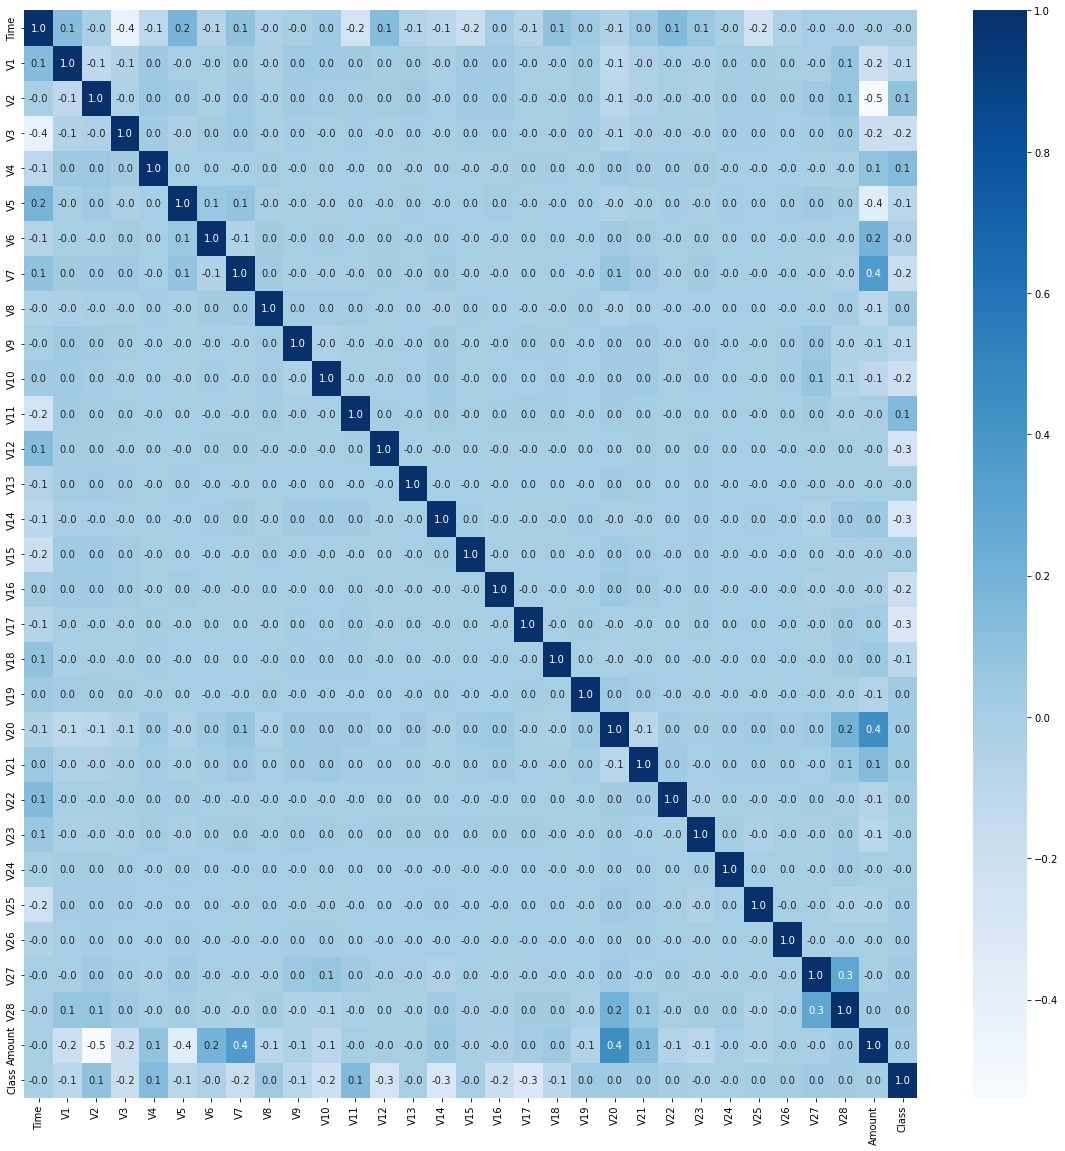

In [16]:
correlation_matrix = df_2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cbar=True, fmt='.1f', annot=True, cmap='Blues')

plt.show()

>Notes:
>- It is shown that the correlation coefficient score bewteen 'Class' and some features is 0.0, meaning these features affect classification very minor.
>- Will drop these features.
>- The highest score is -0.3 of V12, V14 and V17.

## 3 Data Preparation

### 3.1 Feature selection

**Drop these features mentioned above**

In [17]:
df_3 = df_2.drop(['Time','V6','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'], axis=1)
df_3

,V1,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,0


## 4 Modeling & Evaluation

### 4.1 Baseline
Take the original data to train Decision Tree and SVM model.


In [18]:
X_0 = df.drop('Class', axis=1)
y_0 = df['Class']

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_0, y_0, test_size = 0.2, random_state=0)

#### 4.1.1 Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

dt_y_pred_0 = dt.predict(X_test)

from sklearn.metrics import classification_report
dt_report_0 = classification_report(y_test, dt_y_pred_0, output_dict=True)
dt_report_0

{'0': {'precision': 0.9996306458421275,
  'recall': 0.9995427445876788,
  'f1-score': 0.9995866932824469,
  'support': 56861},
 '1': {'precision': 0.7547169811320755,
  'recall': 0.7920792079207921,
  'f1-score': 0.7729468599033816,
  'support': 101},
 'accuracy': 0.9991748885221726,
 'macro avg': {'precision': 0.8771738134871014,
  'recall': 0.8958109762542354,
  'f1-score': 0.8862667765929142,
  'support': 56962},
 'weighted avg': {'precision': 0.9991963865089629,
  'recall': 0.9991748885221726,
  'f1-score': 0.9991848354970587,
  'support': 56962}}

In [20]:
dt_report_0['1']['f1-score']

0.7729468599033816

In [21]:
dt_report_0['macro avg']['f1-score']

0.8862667765929142

#### 4.1.2 SVM

In [22]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(X_train, y_train)

svm_y_pred_0 = svm.predict(X_test)

from sklearn.metrics import classification_report
svm_report_0 = classification_report(y_test, svm_y_pred_0, output_dict=True)
svm_report_0

{'0': {'precision': 0.9982268881008391,
  'recall': 1.0,
  'f1-score': 0.999112657371533,
  'support': 56861},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 101},
 'accuracy': 0.9982268881008391,
 'macro avg': {'precision': 0.4991134440504196,
  'recall': 0.5,
  'f1-score': 0.4995563286857665,
  'support': 56962},
 'weighted avg': {'precision': 0.9964569201274853,
  'recall': 0.9982268881008391,
  'f1-score': 0.9973411188301452,
  'support': 56962}}

### 4.2 After data cleaning

Take df_2 which is after data cleaning to train the two models.

In [23]:
X_1 = df_2.drop('Class', axis=1)
y_1 = df_2['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size = 0.2, random_state=0)

#### 4.2.1 Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

dt_y_pred_1 = dt.predict(X_test)

from sklearn.metrics import classification_report
dt_report_1 = classification_report(y_test, dt_y_pred_1, output_dict=True)
dt_report_1

{'0': {'precision': 0.9997345884351334,
  'recall': 0.9993102228510788,
  'f1-score': 0.9995223606000566,
  'support': 56540},
 '1': {'precision': 0.6637931034482759,
  'recall': 0.8369565217391305,
  'f1-score': 0.7403846153846154,
  'support': 92},
 'accuracy': 0.9990464754908885,
 'macro avg': {'precision': 0.8317638459417047,
  'recall': 0.9181333722951046,
  'f1-score': 0.8699534879923361,
  'support': 56632},
 'weighted avg': {'precision': 0.9991888436862495,
  'recall': 0.9990464754908885,
  'f1-score': 0.9991013853111772,
  'support': 56632}}

#### 4.2.2 SVM

In [25]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(X_train, y_train)

svm_y_pred_1 = svm.predict(X_test)

from sklearn.metrics import classification_report
svm_report_1 = classification_report(y_test, svm_y_pred_1, output_dict=True)
svm_report_1

{'0': {'precision': 0.9983754767622546,
  'recall': 1.0,
  'f1-score': 0.9991870780758492,
  'support': 56540},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 92},
 'accuracy': 0.9983754767622546,
 'macro avg': {'precision': 0.4991877383811273,
  'recall': 0.5,
  'f1-score': 0.4995935390379246,
  'support': 56632},
 'weighted avg': {'precision': 0.9967535926002591,
  'recall': 0.9983754767622546,
  'f1-score': 0.99756387544866,
  'support': 56632}}

### 4.3 After data cleaning & feature selection

Take df_3 which is after data cleaning and feature selection to train the two models.

In [26]:
X_2 = df_3.drop('Class', axis=1)
y_2 = df_3['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size = 0.2, random_state=0)

#### 4.3.1 Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

dt_y_pred_2 = dt.predict(X_test)

from sklearn.metrics import classification_report
dt_report_2 = classification_report(y_test, dt_y_pred_2, output_dict=True)
dt_report_2

{'0': {'precision': 0.9996108605288759,
  'recall': 0.9995224619738239,
  'f1-score': 0.9995666592969269,
  'support': 56540},
 '1': {'precision': 0.7216494845360825,
  'recall': 0.7608695652173914,
  'f1-score': 0.7407407407407408,
  'support': 92},
 'accuracy': 0.9991347647972878,
 'macro avg': {'precision': 0.8606301725324792,
  'recall': 0.8801960135956076,
  'f1-score': 0.8701537000188339,
  'support': 56632},
 'weighted avg': {'precision': 0.99915930581438,
  'recall': 0.9991347647972878,
  'f1-score': 0.9991461905777016,
  'support': 56632}}

#### 4.3.2 SVM

In [28]:
from sklearn.svm import SVC
svm = SVC()
svm = svm.fit(X_train, y_train)

svm_y_pred_2 = svm.predict(X_test)

from sklearn.metrics import classification_report
svm_report_2 = classification_report(y_test, svm_y_pred_2, output_dict=True)
svm_report_2

{'0': {'precision': 0.9996463556954416,
  'recall': 0.9998938804386275,
  'f1-score': 0.999770102746388,
  'support': 56540},
 '1': {'precision': 0.9230769230769231,
  'recall': 0.782608695652174,
  'f1-score': 0.8470588235294118,
  'support': 92},
 'accuracy': 0.9995408956067241,
 'macro avg': {'precision': 0.9613616393861824,
  'recall': 0.8912512880454007,
  'f1-score': 0.9234144631378999,
  'support': 56632},
 'weighted avg': {'precision': 0.9995219668728518,
  'recall': 0.9995408956067241,
  'f1-score': 0.9995220197246343,
  'support': 56632}}

### 4.4 SVM - Balance the unbalanced classes

In [30]:
from sklearn.svm import SVC
svm = SVC(class_weight={1:50})  # use class_weight parameter to tackle the class imbalanced issue
svm = svm.fit(X_train, y_train)

svm_y_pred_3 = svm.predict(X_test)

from sklearn.metrics import classification_report
svm_report_3 = classification_report(y_test, svm_y_pred_3, output_dict=True)
svm_report_3

{'0': {'precision': 0.9996992268360433,
  'recall': 0.9993632826317651,
  'f1-score': 0.9995312265060455,
  'support': 56540},
 '1': {'precision': 0.6756756756756757,
  'recall': 0.8152173913043478,
  'f1-score': 0.7389162561576353,
  'support': 92},
 'accuracy': 0.9990641333521684,
 'macro avg': {'precision': 0.8376874512558594,
  'recall': 0.9072903369680565,
  'f1-score': 0.8692237413318404,
  'support': 56632},
 'weighted avg': {'precision': 0.9991728430476065,
  'recall': 0.9990641333521684,
  'f1-score': 0.9991078514306102,
  'support': 56632}}

## 5 Summary
Visualize the Class1 F-score and macro F-score from both the models for performance comparison

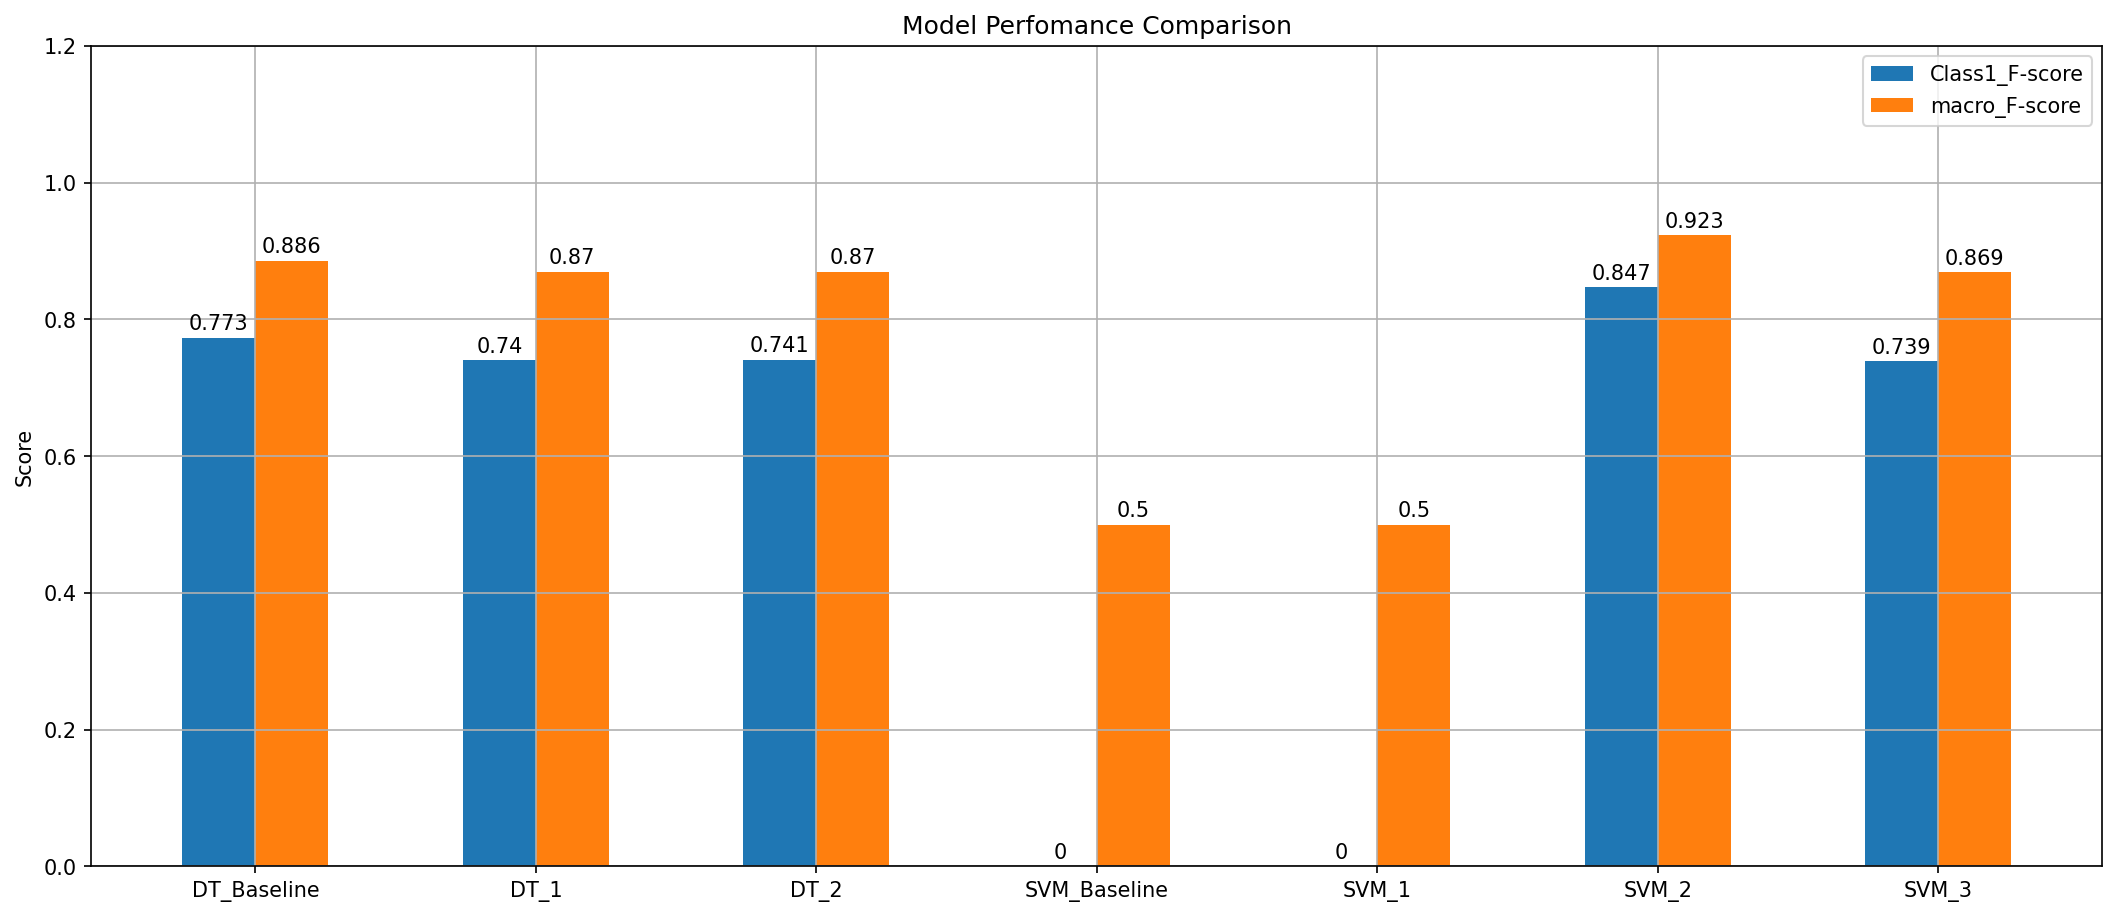

In [42]:
models = ('DT_Baseline', 'DT_1', 'DT_2', 'SVM_Baseline', 'SVM_1',  'SVM_2', 'SVM_3')  
metric_score = {
    'Class1_F-score': (round(dt_report_0['1']['f1-score'],3), 
                       round(dt_report_1['1']['f1-score'],3),
                       round(dt_report_2['1']['f1-score'],3),
                       round(svm_report_0['1']['f1-score'],3), 
                       round(svm_report_1['1']['f1-score'],3),
                       round(svm_report_2['1']['f1-score'],3),
                       round(svm_report_3['1']['f1-score'],3)
                      ),
    'macro_F-score': (round(dt_report_0['macro avg']['f1-score'],3), 
                      round(dt_report_1['macro avg']['f1-score'],3),
                      round(dt_report_2['macro avg']['f1-score'],3),
                      round(svm_report_0['macro avg']['f1-score'],3), 
                      round(svm_report_1['macro avg']['f1-score'],3),
                      round(svm_report_2['macro avg']['f1-score'],3),
                      round(svm_report_3['macro avg']['f1-score'],3)                      
                     )   
}

x = np.arange(len(models))  # the label locations
width = 0.26  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(14,6), layout='constrained', dpi=150)

for attribute, measurement in metric_score.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Perfomance Comparison')
ax.set_xticks(x + width/2, models)
ax.legend(loc='upper right')
ax.set_ylim(0, 1.2)

plt.grid()
plt.show()

>Conclusion
>- For this dataset, data cleaning affects both Decision Tree and SVM models performance a little.
>- Feature selection improves the SVM model performance dramatically, but has a little effect on Decision Tree model. 
>- Adjusting the class weight by class_weight parameter didn't improve SVM model perfomance.
>- As the graph above demonstrated, the best model for this task is SVM model after data cleaning and feature selection, with Class1 F-score 0.847 and macro F-score 0.923.

**Visualize the Class Distribution in test dataset by 3D Diagram**

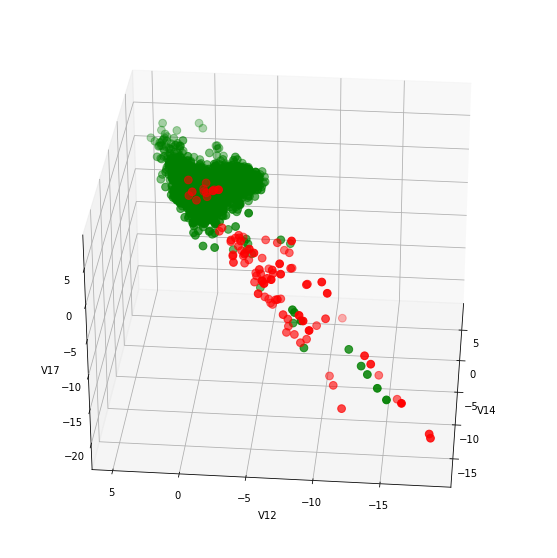

In [53]:
# Test dataset class distribution originally

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test["V14"][y_test == 0], X_test["V12"][y_test == 0], X_test["V17"][y_test == 0], c='green', s=60)
ax.scatter(X_test["V14"][y_test == 1], X_test["V12"][y_test == 1], X_test["V17"][y_test == 1], c='red', s=60)

ax.view_init(30, 185)
plt.xlabel("V14")
plt.ylabel("V12")
ax.set_zlabel('V17')

plt.show()

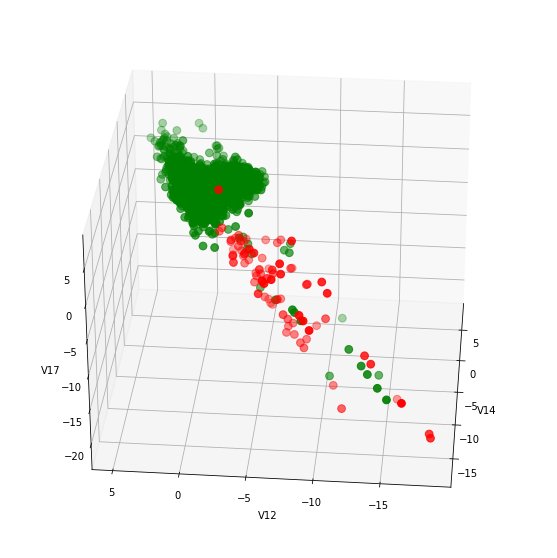

In [54]:
## with predicted results of SVM model2

X_test['predicted'] = svm_y_pred_2

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_test["V14"][X_test.predicted == 0], X_test["V12"][X_test.predicted == 0], X_test["V17"][X_test.predicted == 0], c='green', s=60)
ax.scatter(X_test["V14"][X_test.predicted == 1], X_test["V12"][X_test.predicted == 1], X_test["V17"][X_test.predicted == 1], c='red', s=60)

ax.view_init(30, 185)
plt.xlabel("V14")
plt.ylabel("V12")
ax.set_zlabel('V17')

plt.show()